In [63]:
from pathlib import Path
import sys

notebook_dir = Path.cwd()
others_path = notebook_dir.parent

others_path = others_path.resolve()
if str(others_path) not in sys.path:
    sys.path.append(str(others_path))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d

import eos
import kernels
import gaussianprocess
import prepare_ceft as pc
import prepare_pqcd as pp
import sampling as sam
import anal_helpers as anal
from constants import ns, crust_end, get_phi


# ceft until 2ns

In [64]:
eos_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_eos.npy"

rescale_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_renormscale.npy"

sample_mr_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_mr.npy"

sample_tidal_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_tidal.npy"

n_test = anal.get_n_test(40,200)

In [65]:
eos = np.load(eos_pathname)
Xhats = np.load(rescale_pathname)

e = eos[0]
p = eos[1]
cs2 = eos[2]


tov = np.load(sample_tidal_pathname)

m = tov[1]
r = tov[0]
l = tov[2]
p_c = tov[3]

In [66]:
n_TOV = np.zeros(len(e))
e_nterm = np.zeros(len(e))
p_nterm = np.zeros(len(e))

index = []
last_index = []

for i in range(len(n_TOV)):
    p_i = p_c[i]

    valid_idx = np.where(~np.isnan(p_i))[0]
    
    if len(valid_idx) == 0:
        n_TOV[i] = np.nan 
        continue
    
    last_valid_p = p_i[valid_idx[-1]]

    n_interp = interp1d(p[i], n_test, bounds_error=False, fill_value="extrapolate")
    e_interp = interp1d(p[i], e[i], bounds_error=False, fill_value="extrapolate")

    ntov = n_interp(last_valid_p)
    etov = e_interp(last_valid_p)
    ptov = last_valid_p

    n_TOV[i] = ntov
    e_nterm[i] = etov
    p_nterm[i] = ptov

    idx = np.where(n_test <= ntov)[0][-1]
    last_index.append(idx)

    if pp.check_pqcd_connection(Xhats[i], etov, ptov, ntov):
        index.append(i)

index = np.asarray(index)
last_index = np.asarray(last_index)

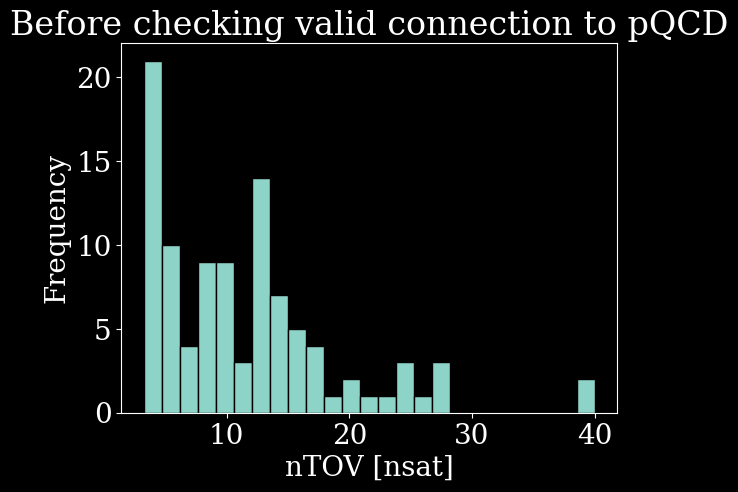

In [67]:
plt.hist(n_TOV, bins=25, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("Before checking valid connection to pQCD")
plt.show()

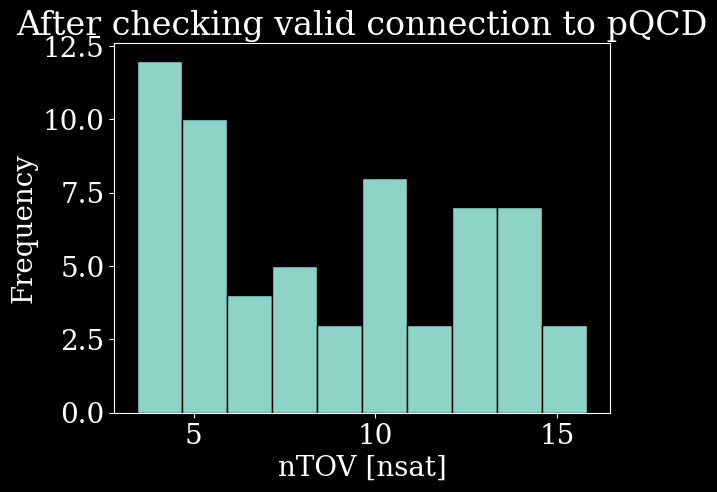

In [68]:
plt.hist(n_TOV[index], bins=10, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("After checking valid connection to pQCD")
plt.show()

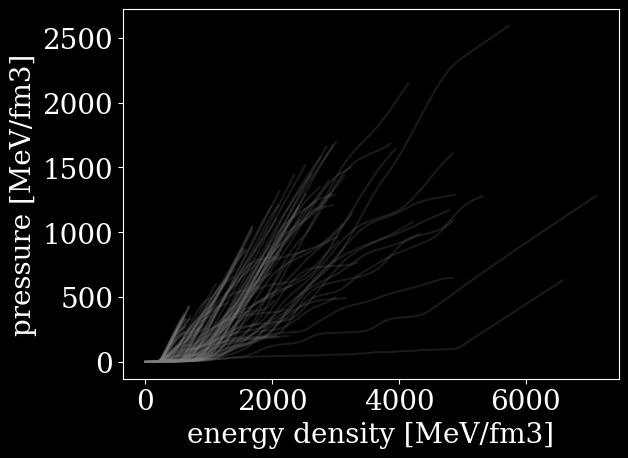

In [69]:
for i in range(len(e)):
    plt.plot(e[i][:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.show()

In [70]:
n_ceft, phi_ceft_avg, phi_ceft_lower, phi_ceft_upper = anal.get_ceft_phi()

_, cs2_ceft_avg, cs2_ceft_lower, cs2_ceft_upper = anal.get_ceft_cs2()

_ , p_ceft, p_ceft_lower, p_ceft_upper = anal.get_ceft_p()

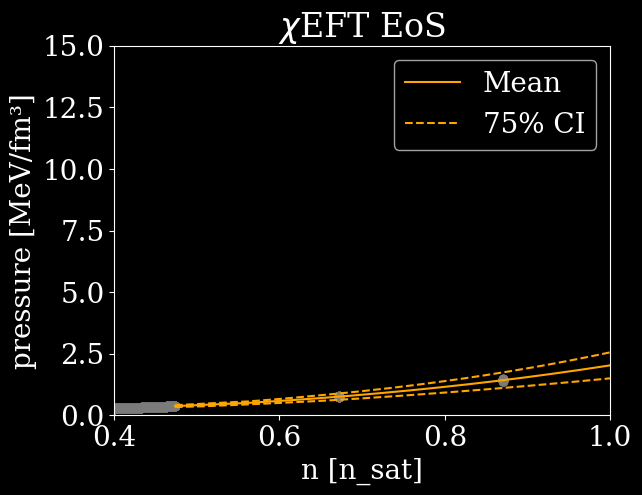

In [71]:
for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)


plt.plot(n_ceft, p_ceft, color='orange', label='Mean')
plt.plot(n_ceft, p_ceft_upper, '--', color='orange', label='75% CI')
plt.plot(n_ceft, p_ceft_lower, '--', color='orange')
plt.ylabel(r'pressure [MeV/fm³]')
plt.xlabel('n [n_sat]')
plt.title(r"$\chi$EFT EoS")
plt.legend()
plt.xlim(0.4,1)
plt.ylim(0,15)
plt.show()

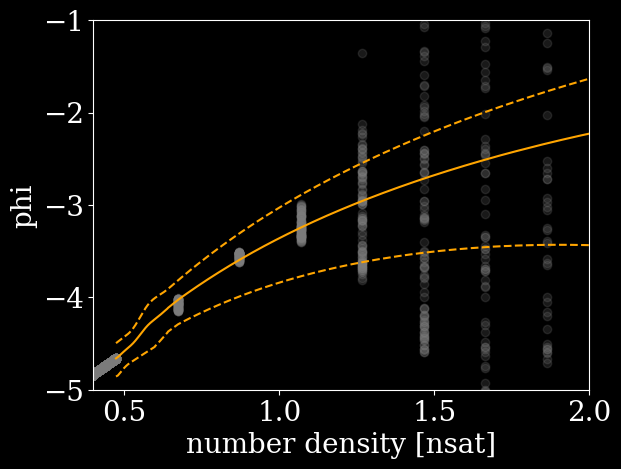

In [72]:
for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], get_phi(cs2[i][:last_index[i]]), color='gray', alpha=0.2)
plt.plot(n_ceft, phi_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("phi")

plt.xlim(0.4,2)
plt.ylim(-5,-1)
plt.show()

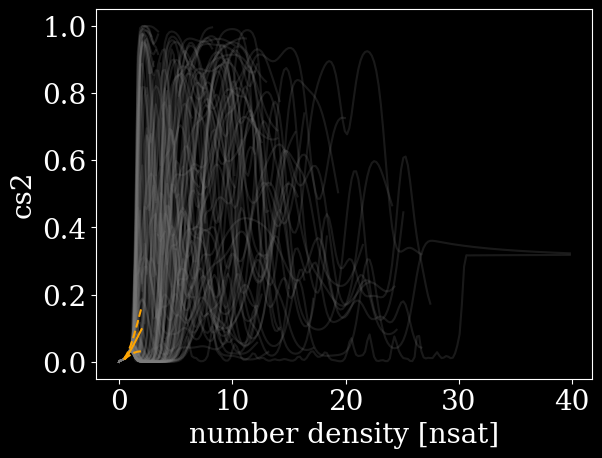

In [73]:
for i in range(len(e)):
    plt.plot(n_test[:last_index[i]], cs2[i][:last_index[i]], color='gray', alpha=0.2)
plt.plot(n_ceft, cs2_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, cs2_ceft_lower, "--", color='orange')
plt.plot(n_ceft, cs2_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("cs2")
plt.show()

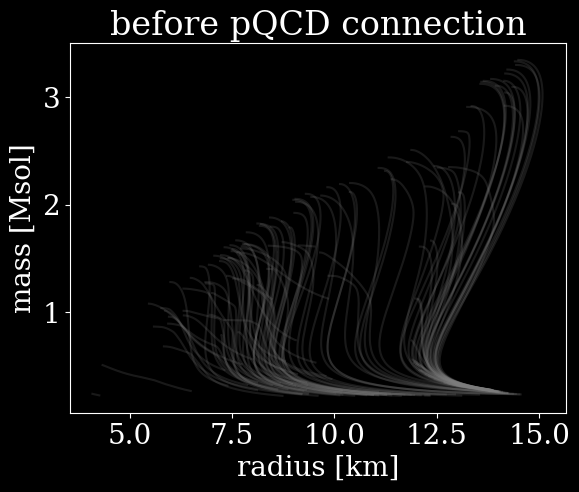

In [74]:
for i in range(len(m)):
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.title("before pQCD connection")
plt.show()

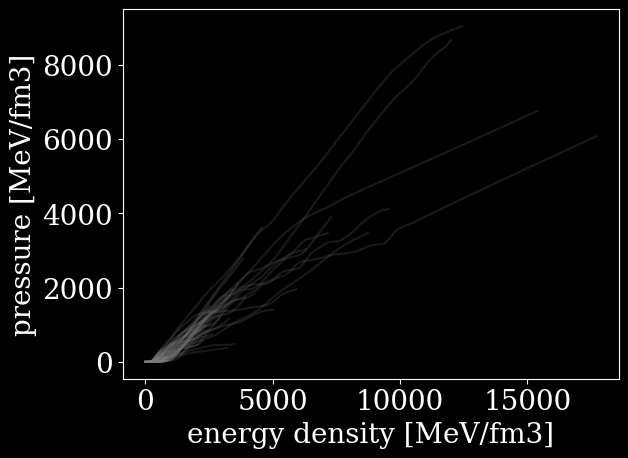

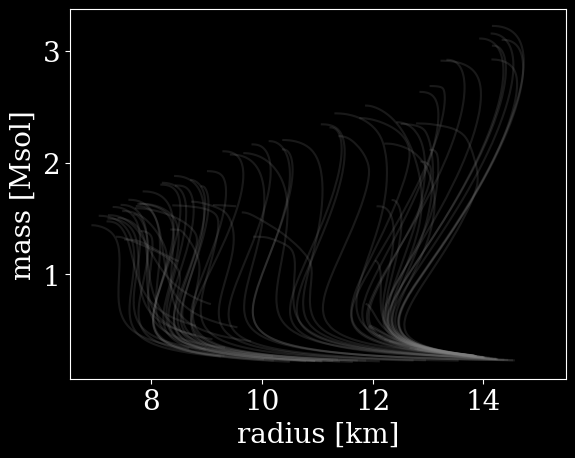

In [75]:
for i,j in zip(index, last_index):
    plt.plot(e[i][:j], p[i][:j], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.show()

for i in index:
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.show()


# ceft until 1.1ns

In [76]:
eos_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_eos.npy"

rescale_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_renormscale.npy"

sample_mr_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_mr.npy"

sample_tidal_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_tidal.npy"

n_test = anal.get_n_test(40,200)

eos = np.load(eos_pathname)
Xhats = np.load(rescale_pathname)

e = eos[0]
p = eos[1]
cs2 = eos[2]


tov = np.load(sample_tidal_pathname)

m = tov[1]
r = tov[0]
l = tov[2]
p_c = tov[3]

In [77]:
n_TOV = np.zeros(len(e))
e_nterm = np.zeros(len(e))
p_nterm = np.zeros(len(e))

index = []
last_index = []

for i in range(len(n_TOV)):
    p_i = p_c[i]

    valid_idx = np.where(~np.isnan(p_i))[0]
    
    if len(valid_idx) == 0:
        n_TOV[i] = np.nan 
        continue
    
    last_valid_p = p_i[valid_idx[-1]]

    n_interp = interp1d(p[i], n_test, bounds_error=False, fill_value="extrapolate")
    e_interp = interp1d(p[i], e[i], bounds_error=False, fill_value="extrapolate")

    ntov = n_interp(last_valid_p)
    etov = e_interp(last_valid_p)
    ptov = last_valid_p

    n_TOV[i] = ntov
    e_nterm[i] = etov
    p_nterm[i] = ptov

    idx = np.where(n_test <= ntov)[0][-1]
    last_index.append(idx)

    if pp.check_pqcd_connection(Xhats[i], etov, ptov, ntov):
        index.append(i)

index = np.asarray(index)
last_index = np.asarray(last_index)

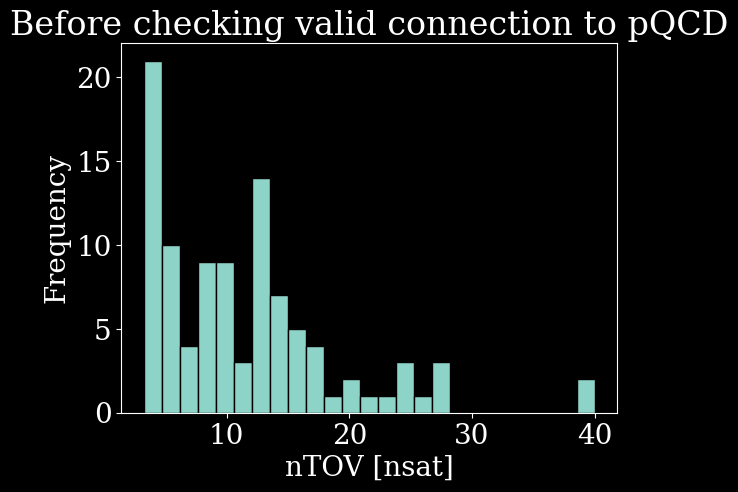

In [78]:
plt.hist(n_TOV, bins=25, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("Before checking valid connection to pQCD")
plt.show()

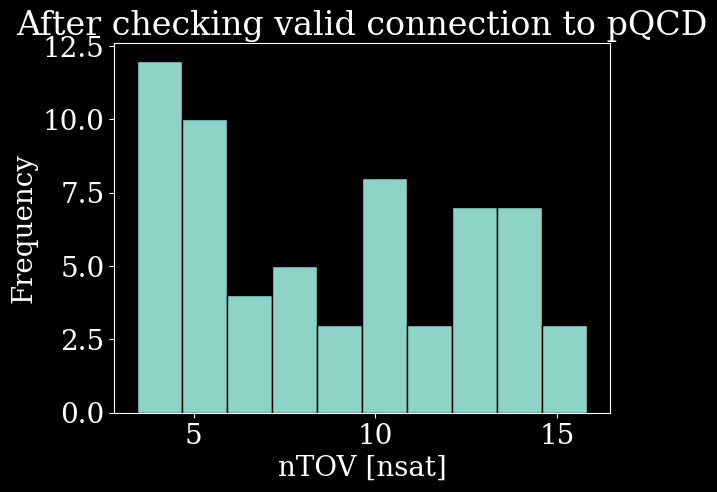

In [79]:
plt.hist(n_TOV[index], bins=10, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("After checking valid connection to pQCD")
plt.show()

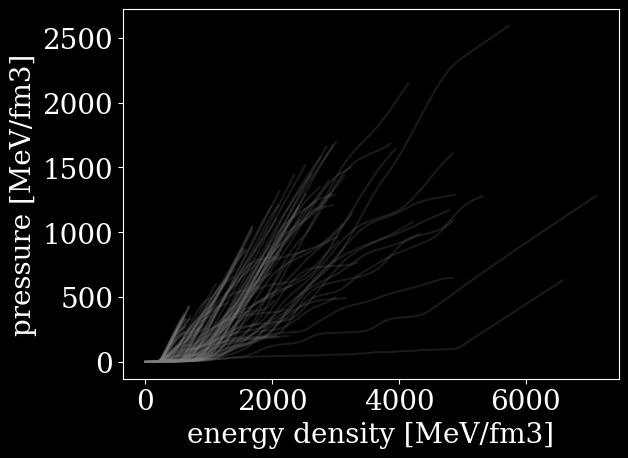

In [80]:
for i in range(len(e)):
    plt.plot(e[i][:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.show()

In [81]:
n_ceft, phi_ceft_avg, phi_ceft_lower, phi_ceft_upper = anal.get_ceft_phi()

_, cs2_ceft_avg, cs2_ceft_lower, cs2_ceft_upper = anal.get_ceft_cs2()

_ , p_ceft, p_ceft_lower, p_ceft_upper = anal.get_ceft_p()

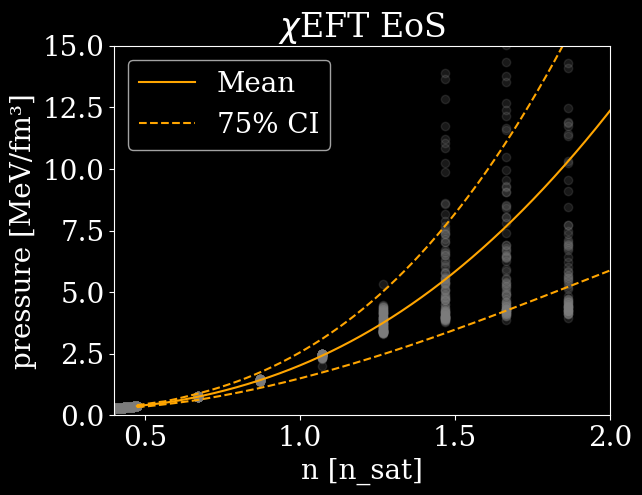

In [82]:
for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)


plt.plot(n_ceft, p_ceft, color='orange', label='Mean')
plt.plot(n_ceft, p_ceft_upper, '--', color='orange', label='75% CI')
plt.plot(n_ceft, p_ceft_lower, '--', color='orange')
plt.ylabel(r'pressure [MeV/fm³]')
plt.xlabel('n [n_sat]')
plt.title(r"$\chi$EFT EoS")
plt.legend()
plt.xlim(0.4,2)
plt.ylim(0,15)
plt.show()

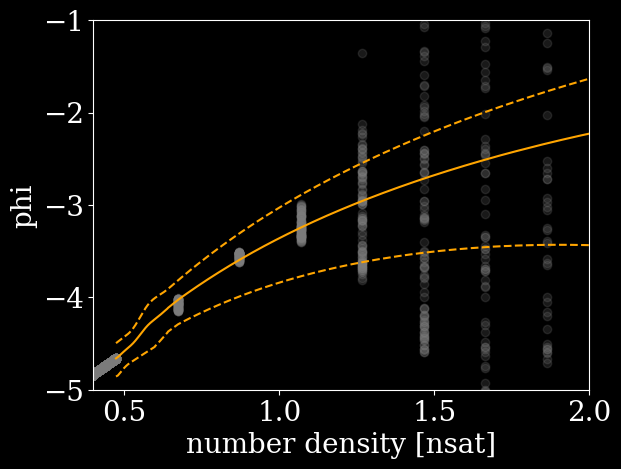

In [83]:
for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], get_phi(cs2[i][:last_index[i]]), color='gray', alpha=0.2)
plt.plot(n_ceft, phi_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("phi")

plt.xlim(0.4,2)
plt.ylim(-5,-1)
plt.show()

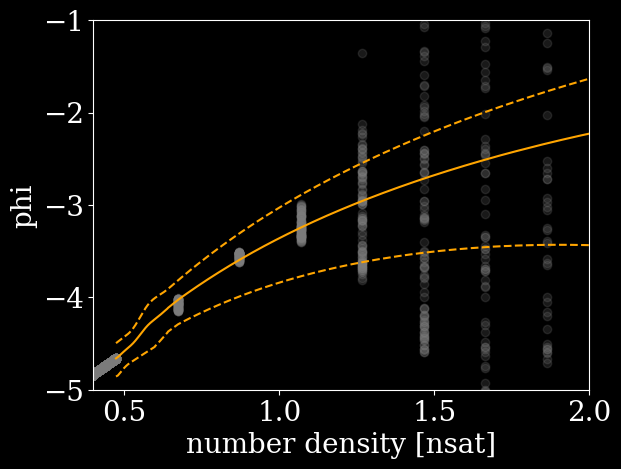

In [84]:
for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], get_phi(cs2[i][:last_index[i]]), color='gray', alpha=0.2)
plt.plot(n_ceft, phi_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("phi")

plt.xlim(0.4,2)
plt.ylim(-5,-1)
plt.show()

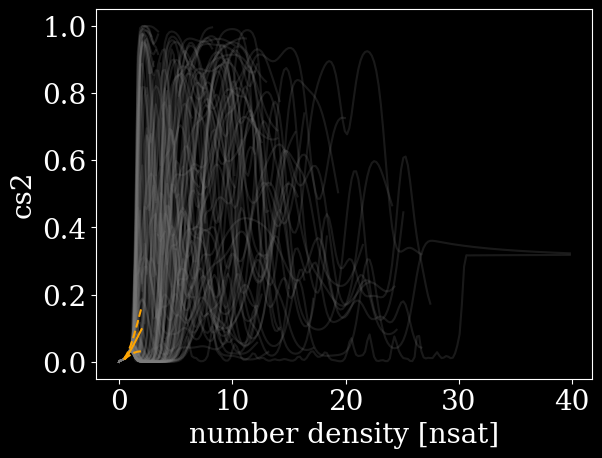

In [85]:
for i in range(len(e)):
    plt.plot(n_test[:last_index[i]], cs2[i][:last_index[i]], color='gray', alpha=0.2)
plt.plot(n_ceft, cs2_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, cs2_ceft_lower, "--", color='orange')
plt.plot(n_ceft, cs2_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("cs2")
plt.show()

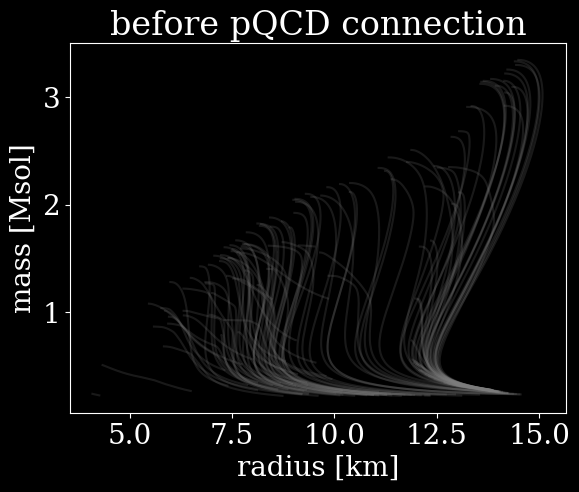

In [86]:
for i in range(len(m)):
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.title("before pQCD connection")
plt.show()

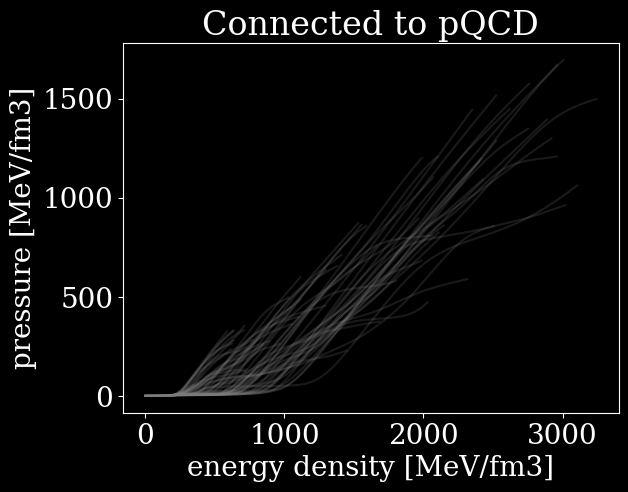

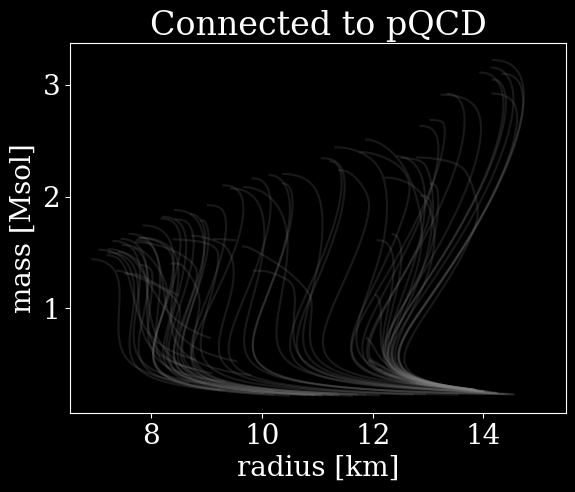

In [87]:
for i in index:
    plt.plot(e[i][:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.title("Connected to pQCD")
plt.show()

for i in index:
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.title("Connected to pQCD")
plt.show()


# ceft endpoint as hyperparameter

In [88]:
eos_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_eos.npy"

rescale_pathname = notebook_dir.parent.parent / f"results/testing/eos/nTOV_renormscale.npy"

sample_mr_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_mr.npy"

sample_tidal_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_tidal.npy"

n_test = anal.get_n_test(40,200)
eos = np.load(eos_pathname)
Xhats = np.load(rescale_pathname)

e = eos[0]
p = eos[1]
cs2 = eos[2]


tov = np.load(sample_tidal_pathname)

m = tov[1]
r = tov[0]
l = tov[2]
p_c = tov[3]
n_TOV = np.zeros(len(e))
e_nterm = np.zeros(len(e))
p_nterm = np.zeros(len(e))

index = []
last_index = []

for i in range(len(n_TOV)):
    p_i = p_c[i]

    valid_idx = np.where(~np.isnan(p_i))[0]
    
    if len(valid_idx) == 0:
        n_TOV[i] = np.nan 
        continue
    
    last_valid_p = p_i[valid_idx[-1]]

    n_interp = interp1d(p[i], n_test, bounds_error=False, fill_value="extrapolate")
    e_interp = interp1d(p[i], e[i], bounds_error=False, fill_value="extrapolate")

    ntov = n_interp(last_valid_p)
    etov = e_interp(last_valid_p)
    ptov = last_valid_p

    n_TOV[i] = ntov
    e_nterm[i] = etov
    p_nterm[i] = ptov

    idx = np.where(n_test <= ntov)[0][-1]
    last_index.append(idx)

    if pp.check_pqcd_connection(Xhats[i], etov, ptov, ntov):
        index.append(i)

index = np.asarray(index)
last_index = np.asarray(last_index)

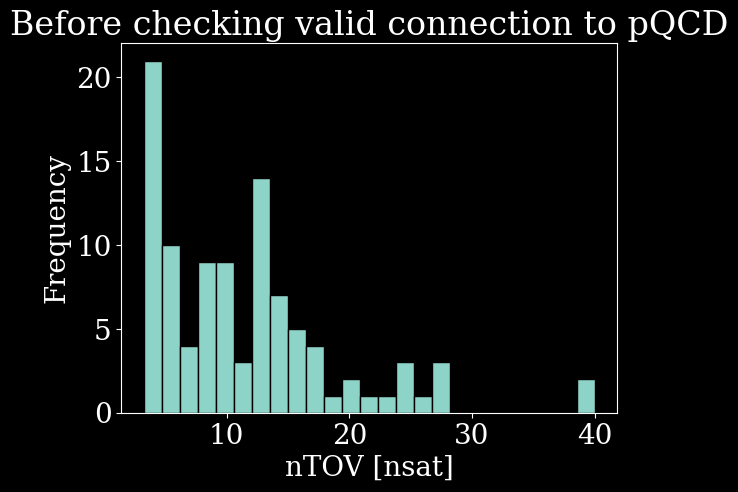

In [89]:
plt.hist(n_TOV, bins=25, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("Before checking valid connection to pQCD")
plt.show()

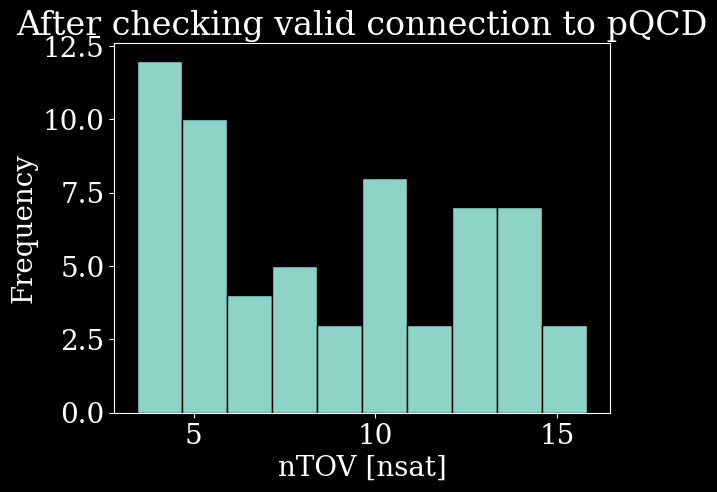

In [90]:
plt.hist(n_TOV[index], bins=10, edgecolor='black')

plt.xlabel('nTOV [nsat]')
plt.ylabel('Frequency')
plt.title("After checking valid connection to pQCD")
plt.show()

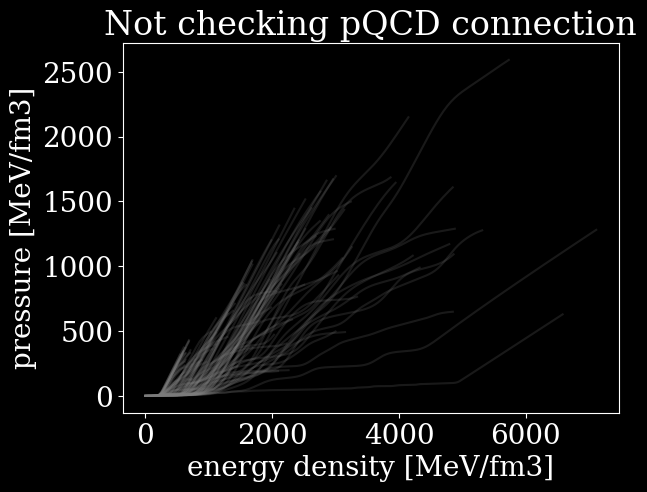

In [91]:
for i in range(len(e)):
    plt.plot(e[i][:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.title("Not checking pQCD connection")
plt.show()

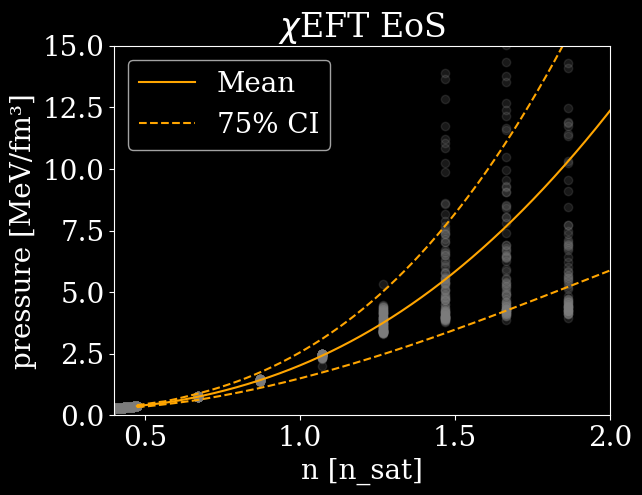

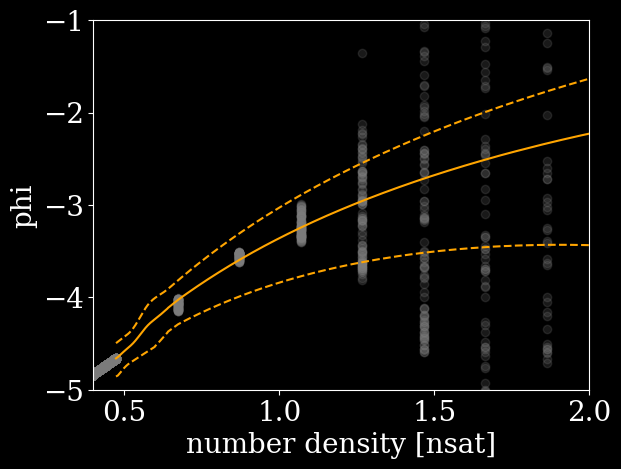

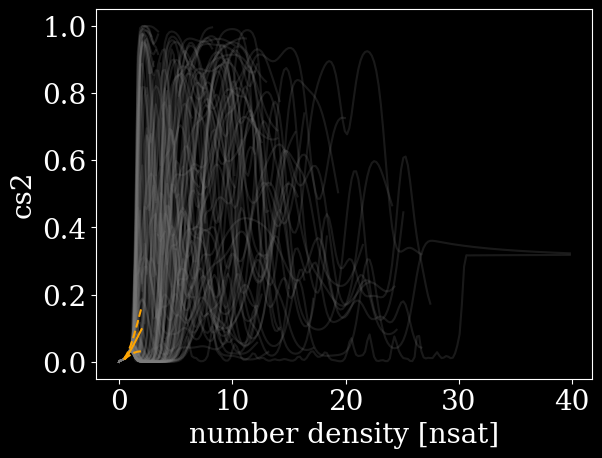

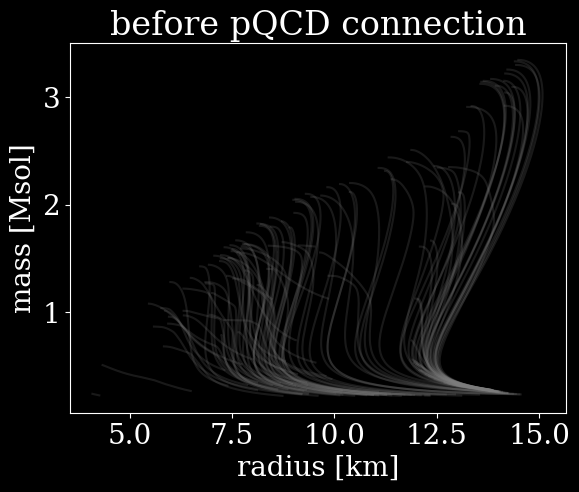

In [92]:
n_ceft, phi_ceft_avg, phi_ceft_lower, phi_ceft_upper = anal.get_ceft_phi()

_, cs2_ceft_avg, cs2_ceft_lower, cs2_ceft_upper = anal.get_ceft_cs2()

_ , p_ceft, p_ceft_lower, p_ceft_upper = anal.get_ceft_p()

for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)


plt.plot(n_ceft, p_ceft, color='orange', label='Mean')
plt.plot(n_ceft, p_ceft_upper, '--', color='orange', label='75% CI')
plt.plot(n_ceft, p_ceft_lower, '--', color='orange')
plt.ylabel(r'pressure [MeV/fm³]')
plt.xlabel('n [n_sat]')
plt.title(r"$\chi$EFT EoS")
plt.legend()
plt.xlim(0.4,2)
plt.ylim(0,15)
plt.show()

for i in range(len(e)):
    plt.scatter(n_test[:last_index[i]], get_phi(cs2[i][:last_index[i]]), color='gray', alpha=0.2)
plt.plot(n_ceft, phi_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, phi_ceft_lower, "--", color='orange')
plt.plot(n_ceft, phi_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("phi")

plt.xlim(0.4,2)
plt.ylim(-5,-1)
plt.show()

for i in range(len(e)):
    plt.plot(n_test[:last_index[i]], cs2[i][:last_index[i]], color='gray', alpha=0.2)
plt.plot(n_ceft, cs2_ceft_avg, color='orange',label='Mean')
plt.plot(n_ceft, cs2_ceft_lower, "--", color='orange')
plt.plot(n_ceft, cs2_ceft_upper, "--", color='orange', label='75% CI')
plt.xlabel("number density [nsat]")
plt.ylabel("cs2")
plt.show()

for i in range(len(m)):
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.title("before pQCD connection")
plt.show()

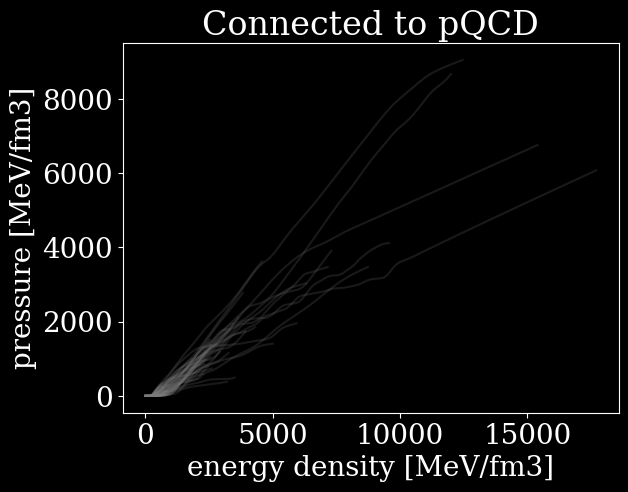

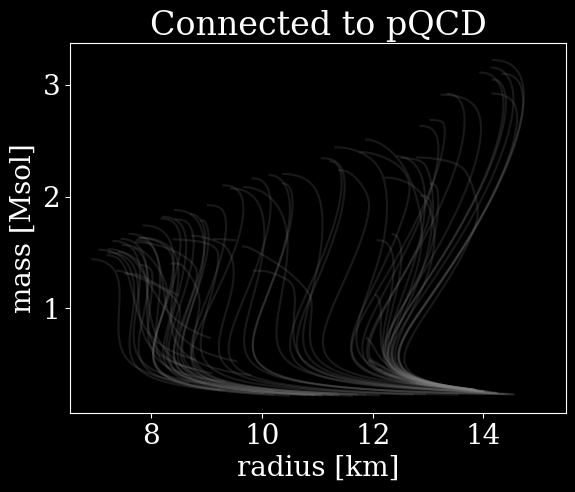

In [93]:
for i,j in zip(index, last_index):
    plt.plot(e[i][:j], p[i][:j], color='gray', alpha=0.2)
plt.xlabel("energy density [MeV/fm3]")
plt.ylabel("pressure [MeV/fm3]")
plt.title("Connected to pQCD")
plt.show()

for i in index:
    plt.plot(r[i], m[i], color='gray', alpha=0.2)
plt.xlabel("radius [km]")
plt.ylabel("mass [Msol]")
plt.title("Connected to pQCD")
plt.show()

# for prezz

In [108]:
n_test = anal.get_n_test(40,400)

In [109]:
eos_pathname = notebook_dir.parent.parent / f"results//presentation&writing/seminar/SE_ntovns_valid_eos.npy"

rescale_pathname = notebook_dir.parent.parent / f"results/presentation&writing/seminar/SE_ntovns_valid_renormscale.npy"

sample_mr_pathname = notebook_dir.parent.parent / f"results/testing/tov_res/nTOV_mr.npy"

sample_tidal_pathname = notebook_dir.parent.parent / f"results//presentation&writing/seminar/SE_ntovns_valid_tidal.npy"

eos = np.load(eos_pathname)
Xhats = np.load(rescale_pathname)

e = eos[0]
p = eos[1]
cs2 = eos[2]


tov = np.load(sample_tidal_pathname)

m = tov[1]
r = tov[0]
l = tov[2]
p_c = tov[3]
n_TOV = np.zeros(len(e))
e_nterm = np.zeros(len(e))
p_nterm = np.zeros(len(e))

index = []
last_index = []

for i in range(len(n_TOV)):
    p_i = p_c[i]

    valid_idx = np.where(~np.isnan(p_i))[0]
    
    if len(valid_idx) == 0:
        n_TOV[i] = np.nan 
        continue
    
    last_valid_p = p_i[valid_idx[-1]]

    n_interp = interp1d(p[i], n_test, bounds_error=False, fill_value="extrapolate")
    e_interp = interp1d(p[i], e[i], bounds_error=False, fill_value="extrapolate")

    ntov = n_interp(last_valid_p)
    etov = e_interp(last_valid_p)
    ptov = last_valid_p

    n_TOV[i] = ntov
    e_nterm[i] = etov
    p_nterm[i] = ptov

    idx = np.where(n_test <= ntov)[0][-1]
    last_index.append(idx)

    if pp.check_pqcd_connection(Xhats[i], etov, ptov, ntov):
        index.append(i)

index = np.asarray(index)
last_index = np.asarray(last_index)

In [96]:
index.shape

(350,)

In [97]:
341/500

0.682

In [104]:
n_ceft, cs2_avg, cs2_upper, cs2_lower = anal.get_ceft_cs2()

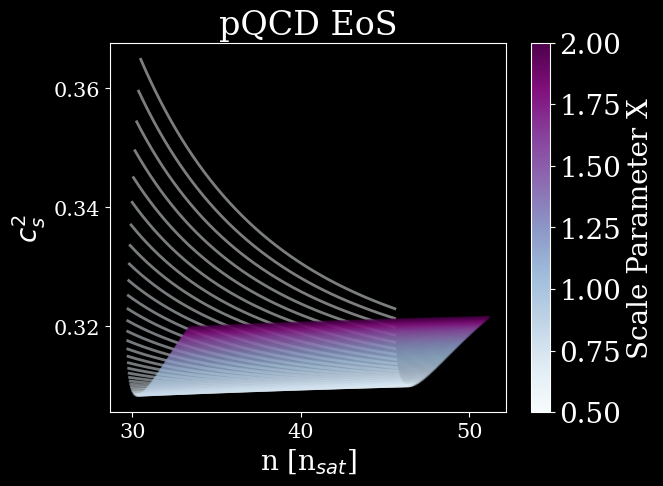

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pqcd.pQCD import pQCD

mu_grid = np.linspace(2.4, 2.75, 500)

pQCD1 = pQCD(1/2)  
pQCD2 = pQCD(2)    
array = np.geomspace(1/2, 2, 100)

norm = mcolors.Normalize(vmin=array.min(), vmax=array.max())
colormap = cm.BuPu
for i in array:
    pQCDx = pQCD(i)
    color = colormap(norm(i)) 
    plt.plot(np.vectorize(pQCDx.number_density)(mu_grid)/0.16, 
             np.vectorize(pQCDx.speed2)(mu_grid), 
             color=color, alpha=0.5,
             linewidth=2)


sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(array)  
cbar = plt.colorbar(sm, ax=plt.gca()) 
cbar.set_label('Scale Parameter X', fontsize=20)

plt.rcParams["font.size"] = 20
plt.ylabel('$c_s^2$', fontsize=20)
plt.xlabel('n [n$_{sat}$]', fontsize=20)
plt.title('pQCD EoS')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [106]:
X = np.geomspace(1/2,2,100)
mu_grid = np.linspace(2.2,3,100)

n_cs2_arrays = []

for iteration in X:
    pQCD_temp = pQCD(iteration)
    n_temp  = np.vectorize(pQCD_temp.number_density)(mu_grid)/0.16 #nsat
    cs2_temp = np.vectorize(pQCD_temp.speed2)(mu_grid)
    X_temp = [n_temp,cs2_temp]
    n_cs2_arrays.append(X_temp)

n_cs2_arrays = np.asarray(n_cs2_arrays)

n_test_1 = n_cs2_arrays[1,0,:]
cs2_test = n_cs2_arrays[1,1,:]

n_rounded = np.round(n_test_1).astype(int)
cs2_count = 1
cs2_sum = cs2_test[0]
cs2_bin=[]
n_bin=[]

def append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i):
    
    cs2_bin.append(float(cs2_sum / cs2_count))
    if cs2_count != 1:
        n_bin.append(int(n_rounded[i - 1]))
    else:
        n_bin.append(int(n_rounded[i]))

binned_data = []

for k in range(len(X)):

    n_iter = n_cs2_arrays[k,0,:]
    cs2_iter = n_cs2_arrays[k,1,:]

    n_rounded = np.round(n_iter).astype(int)
    cs2_count = 1
    cs2_sum = cs2_iter[0]
    cs2_bin=[]
    n_bin=[]

    for i in range(len(n_rounded)): #n is rounded

        if i!=len(n_rounded)-1:

            if n_rounded[i+1] == n_rounded[i]:
                cs2_sum += cs2_iter[i+1]
                cs2_count += 1

            else:
                append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)
                cs2_count = 1
                cs2_sum = cs2_iter[i+1]

        else:
            append_bins(cs2_bin, n_bin, n_rounded, cs2_sum, cs2_count, i)

    binned_data.append([n_bin,cs2_bin])

s = 25
e = 60
cs2_min = []
cs2_max = []
cs2_mean = []

for i in range(s,e):
    interest_n = i

    cs2_values_n = [cs2[n_i.index(interest_n)] for n_i, cs2 in binned_data if interest_n in n_i]
    cs2_min.append(np.min(cs2_values_n))
    cs2_max.append(np.max(cs2_values_n))
    cs2_mean.append(np.mean(cs2_values_n))

cs2_mean_high_low = (np.array(cs2_min)+np.array(cs2_max)) * 0.5

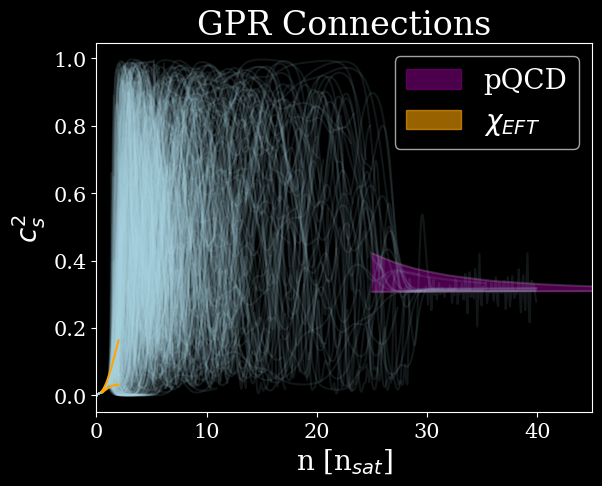

In [117]:
for i,j in zip(index, last_index):
    plt.plot(n_test[:j], cs2[i][:j], color='lightblue', alpha=0.1)



plt.plot(binned_data[0][0][1:-1], cs2_min, color = "gray",alpha=0.3)
plt.plot(binned_data[0][0][1:-1], cs2_max, color = "gray",alpha=0.3)

plt.fill_between(binned_data[0][0][1:-1], cs2_min, cs2_max, color='purple', alpha=0.6, label="pQCD")


plt.plot(n_ceft, cs2_lower, color="orange")
plt.plot(n_ceft, cs2_upper, color="orange")
plt.fill_between(n_ceft, cs2_lower, cs2_upper, color='orange', alpha=0.6, label=r"$\chi_{EFT}$")
plt.rcParams["font.size"] = 20
plt.ylabel('$c_s^2$', fontsize=20)
plt.xlabel('n [n$_{sat}$]', fontsize=20)
plt.title('GPR Connections')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(0,45)
plt.show()

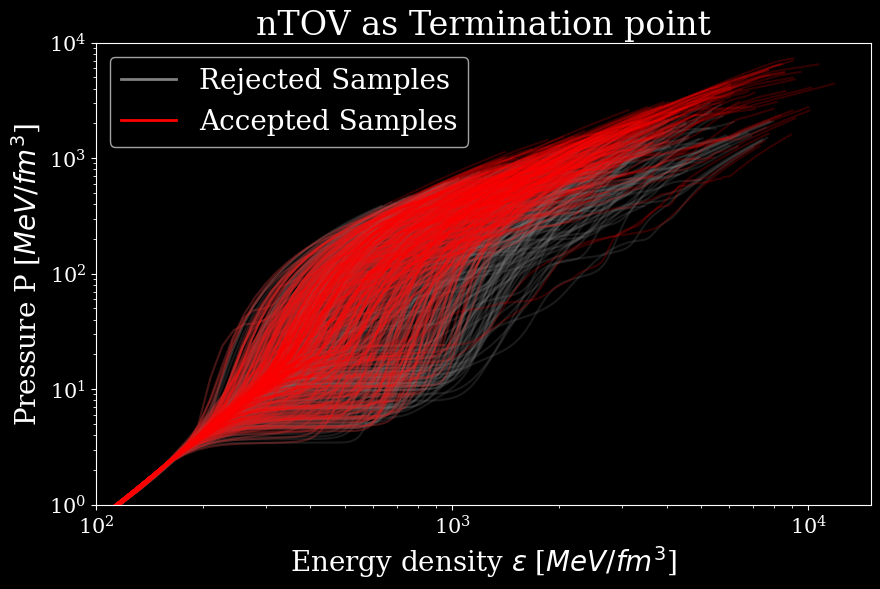

In [121]:
plt.figure(figsize=(10, 6))

plt.style.use('dark_background')
ax = plt.gca()
ax.set_facecolor('black')
plt.rcParams["font.family"] = "serif"


for i in range(len(e)):
    plt.plot(e[i][:last_index[i]], p[i][:last_index[i]], color='gray', alpha=0.2)

for i,j in zip(index, last_index):
    plt.plot(e[i][:j], p[i][:j], color='red', alpha=0.2)


plt.yscale("log")
plt.xscale("log")

plt.xlim(100,15000)
plt.ylim(1,10000)

plt.xlabel(r"Energy density $\epsilon$ [$MeV/fm^{3}$]")
plt.ylabel(r'Pressure P [$MeV/fm^{3}$]')
plt.title(r"nTOV as Termination point")
legend_elements = [
    Line2D([0], [0], color='grey', lw=2, alpha=1, label='Rejected Samples'),
    Line2D([0], [0], color='red', lw=2, alpha=1, label='Accepted Samples')
]
plt.legend(handles=legend_elements)
plt.rcParams["font.size"] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

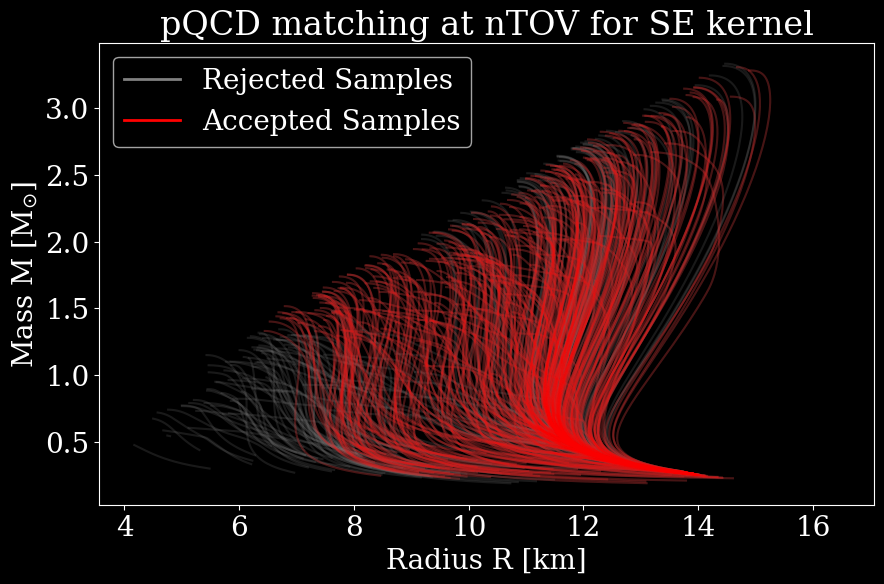

In [123]:
plt.figure(figsize=(10, 6))

for i in range(len(m)):
    plt.plot(r[i], m[i], color='gray', alpha=0.2)

for i in index:
    plt.plot(r[i], m[i], color='red', alpha=0.2)

plt.xlabel(r"Radius R [km]")
plt.ylabel(r'Mass M [M$_{\odot}$]')

sat = "{sat}"
plt.title(f"pQCD matching at nTOV for SE kernel")
plt.grid(False)


legend_elements = [
    Line2D([0], [0], color='grey', lw=2, alpha=1, label='Rejected Samples'),
    Line2D([0], [0], color='red', lw=2, alpha=1, label='Accepted Samples')
]
plt.legend(handles=legend_elements)
plt.show()
